### Imports

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Questão 1

In [180]:
dados = np.genfromtxt('artificial1d.csv', delimiter = ',')

x = dados[:,0].reshape(-1,1)
y = dados[:,1].reshape(-1,1)

### a) 

w0 =  [0.06761792] w1 =  [1.57486517]
MSE =  0.10670045066468493


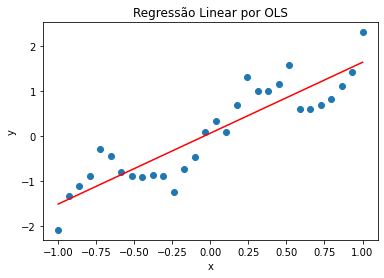

In [181]:
def OLS(x, y, alpha = 0.1, l2 = 0):
    
    n = len(y)
    x = np.c_[np.ones(n), x]
    identity = np.identity(len(x[0]))
    w = np.linalg.solve((x.T @ x + l2 * identity),(x.T @ y)).reshape(-1,1)
    yhat = x @ w
    e = y - yhat
    MSE = ((e ** 2).sum())/(2*n)
    return w, MSE

w, MSE = OLS(x, y)

print("w0 = ", w[0], "w1 = ", w[1])
print("MSE = ", MSE)

fig, ax = plt.subplots()
ax.scatter(x, y, label='Data')

x_range = np.linspace(x.min(), x.max(), 100)
y_pred = w[1] * x_range + w[0]
ax.plot(x_range, y_pred, label='Model', color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Regressão Linear por OLS')

plt.show()

### b)

w = [[0.06761613]
 [1.53303263]]
MSE = 0.10703569035402714


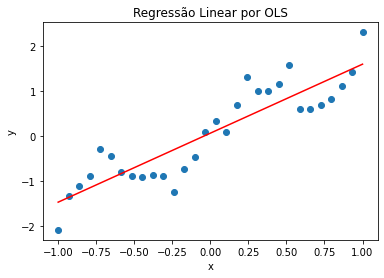

In [182]:
def GD(x, y, alpha = 0.1, lamb = 0, max_iterations = 10):
    
    n = len(y)
    x = np.c_[np.ones(n), x]
    w = np.zeros(x.shape[1]).reshape(-1,1)
    yhat = np.zeros(n).reshape(-1,1)
    e = np.zeros(n).reshape(-1,1)
                 
    for t in range(max_iterations):
        yhat = x @ w
        e = y - yhat
        w[0] = w[0] + (alpha/n * e.sum())
        for column in range(1, len(w)):
            w[column] = w[column] + alpha * ((e * x[:,[column]]).sum()/n - lamb * w[column])
                
    MSE = ((e ** 2).sum())/(2*n)
    return w, MSE

w, MSE = GD(x, y, alpha=0.1, max_iterations = 100)

print("w =", w)
print("MSE =", MSE)

fig, ax = plt.subplots()
ax.scatter(x, y, label='Data')

x_range = np.linspace(x.min(), x.max(), 100)
y_pred = w[1] * x_range + w[0]
ax.plot(x_range, y_pred, label='Model', color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Regressão Linear por OLS')

plt.show()

### c)

w0 = 0.06720901906097008 w1 = 1.5309343343166897
MSE = 0.10753085117171818


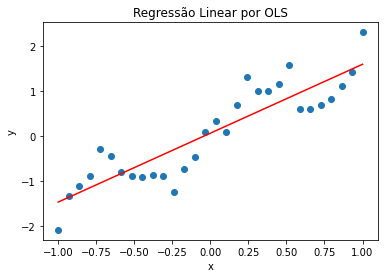

In [183]:
def SGD(x, y, alpha = 0.1, lamb = 0, max_iterations = 100):
    
    n = len(y)
    x = np.c_[np.ones(n), x]
    w = np.zeros(len(x[0]))
    yhat = np.zeros(n)
    e = np.zeros(n)
    indices = np.arange(n)
                 
    for t in range(max_iterations):
        np.random.shuffle(indices)
        for j in indices:
            yhat[j] = (x[j] * w).sum()
            e[j] = y[j] - yhat[j]
            w[0] = w[0] + (alpha * e[j]/n)
            for column in range(1, len(w)):
                w[column] = w[column] + alpha * ((e[j] * x[j,column]).sum()/n - lamb * w[column])
        
    MSE = ((e ** 2).sum())/(2*n)
    return w, MSE

w, MSE = SGD(x, y, alpha = 0.1, max_iterations = 100)

print("w0 =", w[0], "w1 =", w[1])
print("MSE =", MSE)

fig, ax = plt.subplots()
ax.scatter(x, y, label='Data')

x_range = np.linspace(x.min(), x.max(), 100)
y_pred = w[1] * x_range + w[0]
ax.plot(x_range, y_pred, label='Model', color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Regressão Linear por OLS')

plt.show()

## Questão 2 (perdão, professor, eu tentei)
### a)

In [184]:
dados = np.genfromtxt('california.csv', delimiter = ',')
indices = np.arange(dados.shape[0])
np.random.shuffle(indices) # Cria uma permutação aleatória dos índices dos dados

divisor = math.floor(4 * len(indices)/5) # Encontra a posição que divide o teste e o treino

indices_treino = np.zeros(divisor)
indices_teste = np.zeros(len(indices) - divisor)

for i in range(divisor):
    indices_treino[i] = indices[i] # Separa uma porção do vetor 'indices' como os índices de treino

for j in range(len(indices) - divisor):
    indices_teste[j] = indices[divisor + j] # Separa a outra porção como os índices de teste

dados_treino = np.zeros((divisor, dados.shape[1]))
dados_teste = np.zeros((len(indices) - divisor, dados.shape[1]))

for i in range(divisor):
    dados_treino[i] = dados[int(indices_treino[i])] # Pega uma porção das linhas de dados e coloca no treino
    
for j in range(len(indices) - divisor):
    dados_teste[j] = dados[int(indices_teste[j])] # Pega a outra porção das linhas de dados e coloca no treino

y_treino = dados_treino[:,dados_treino.shape[1] - 1].reshape(-1,1)
x_treino = dados_treino[:,np.arange(dados_treino.shape[1] - 1)] # Separa os dados de treino em x e y

y_teste = dados_teste[:, dados_teste.shape[1] - 1].reshape(-1,1)
x_teste = dados_teste[:, np.arange(dados_teste.shape[1] - 1)]   # Separa os dados de teste em x e y

### b) , c) e d)

RMSE de treino:
[1.11436070e+01 1.11436080e+01 1.38381325e+03 1.38381325e+03
 1.71841929e+05 1.71841929e+05 2.13393307e+07 2.13393307e+07
 2.64991809e+09 2.64991809e+09 3.29066828e+11 3.29066828e+11
 4.08635187e+13]
RMSE de teste:
[4.21133761e+00 4.07883311e+00 4.02341151e+00 4.03651016e+00
 2.73464095e+03 1.53015443e+03 1.32949143e+07 7.49963456e+06
 6.52614420e+10 3.68307854e+10 3.20538052e+14 1.80903890e+14
 1.57441916e+18]


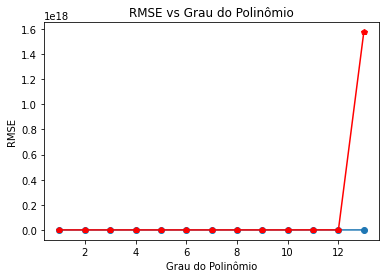

In [185]:
def minMaxScale(x, y):
    data = np.c_[x, y]
    min_value = np.min(data)
    max_value = np.max(data)
    normalized_x = (x - min_value)/(max_value - min_value)
    normalized_y = (y - min_value)/(max_value - min_value)
    
    return normalized_x, normalized_y, min_value, max_value

def minMaxDescale(normalized_x,normalized_y,min_value,max_value):
    
    denormalized_x = (normalized_x * (max_value - min_value)) + min_value
    denormalized_y = (normalized_y * (max_value - min_value)) + min_value
    
    return denormalized_x, denormalized_y

def minMaxDescaleMSE(normalized_MSE, min_value, max_value):
    
    denormalized_MSE = (normalized_MSE * (max_value - min_value)) + min_value
    
    return denormalized_MSE

def addPolynomialColumns(x, grau = 2):
    if grau < 2:
        return x
    novo_x = x.copy()
    for g in range(2 , grau + 1):
        for coluna in range(x.shape[1]):
            nova_coluna = x[:,coluna] ** g
            novo_x = np.c_[novo_x, nova_coluna]
    return novo_x

erros_treino = np.zeros(13)
erros_teste = np.zeros(13)

for grau in range(1, 14):
    x_treino_polinomial = addPolynomialColumns(x_treino, grau)
    x_treino_polinomial_normalizado, y_treino_normalizado, min_treino, max_treino = minMaxScale(x_treino_polinomial, y_treino)
    
    x_teste_polinomial = addPolynomialColumns(x_teste, grau)
    x_teste_polinomial_normalizado, y_teste_normalizado, min_teste, max_teste = minMaxScale(x_teste_polinomial, y_teste)
    
    w, MSE = OLS(x_treino_polinomial_normalizado, y_treino_normalizado, l2 = 0.01)
    
    x_teste_polinomial = np.c_[np.ones(len(y_teste)), x_teste_polinomial]
    
    RMSE = np.sqrt(abs(minMaxDescaleMSE(MSE, min_treino, max_treino)))
    erros_treino[grau - 1] = RMSE
    erros_teste[grau - 1] = np.sqrt(abs((y_teste - (x_teste_polinomial @ w))**2).sum()/(2*(x.shape[0])))

print("RMSE de treino:")
print(erros_treino)

print("RMSE de teste:")
print(erros_teste)
    
x_axis = [i + 1 for i in range(len(erros_treino))]

plt.plot(x_axis, erros_treino, marker='o')
plt.plot(x_axis, erros_teste, marker='p', color='red')

plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE vs Grau do Polinômio')


plt.show()
